In [1]:
import numpy as np, matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from colormap_maker import color_gradient
from algos import generate_mandelbrot_set, generate_julia_set

# Defining a colormap

In [29]:
blue = (0, 0, 1)
light_blue = (0, 0, .5)
navy = (0, 0, .2)

red = (1, 0, 0)
light_yellow = (1, 1, 197 / 255)

black = (0, 0, 0)
gray = (0.5, 0.5, 0.5)
light_gray = (0.9,0.9,0.9)     


num_colors = 2048
colors = [
    navy, light_blue, blue,
    gray, light_gray,
    light_gray, light_yellow,
    red, red, red, red, red, red,
    light_yellow, light_gray, gray, black
]
gradient = color_gradient(colors)
palette = np.array([
    gradient(i / num_colors) for i in range(num_colors)
])

# Drawing the Mandelbrot's set

In [24]:
base_resolution = 512
max_iter = 150
escape_radius = 1000

x_int = (-2, .5)
y_int = (-1.25, 1.25)

aspect_ratio = (y_int[1] - y_int[0]) / (x_int[1] - x_int[0])
resolution = (np.floor(base_resolution * aspect_ratio).astype(np.int32), base_resolution)
if aspect_ratio > 1: resolution = resolution[::-1]

In [20]:
x = np.linspace(*x_int, num=resolution[1])
y = np.linspace(*y_int, num=resolution[0])
xx, yy = np.meshgrid(x, y)
c = xx + 1j* yy

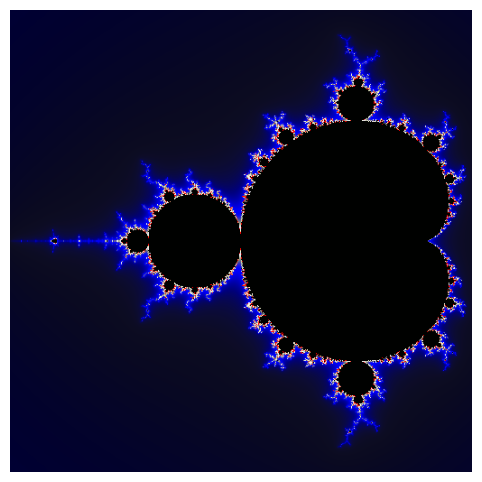

In [31]:
mandel_grad = generate_mandelbrot_set(c, max_iter, escape_radius)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
cmap = ListedColormap(palette)

img = ax.imshow(
    mandel_grad / max_iter,
    cmap=cmap,
    origin='lower',
)
ax.set_axis_off();

# Drawing the Julia's Set

In [32]:
base_resolution = 2048
max_iter = 150
escape_radius = None
julia_cons = -0.8 + 0.156j

x_int = (-1.75, 1.75)
y_int = (-1, 1)

aspect_ratio = (y_int[1] - y_int[0]) / (x_int[1] - x_int[0])
resolution = (np.floor(base_resolution * aspect_ratio).astype(np.int32), base_resolution)
if aspect_ratio > 1: resolution = resolution[::-1]

In [33]:
x = np.linspace(*x_int, num=resolution[1])
y = np.linspace(*y_int, num=resolution[0])
xx, yy = np.meshgrid(x, y)
c = xx + 1j* yy

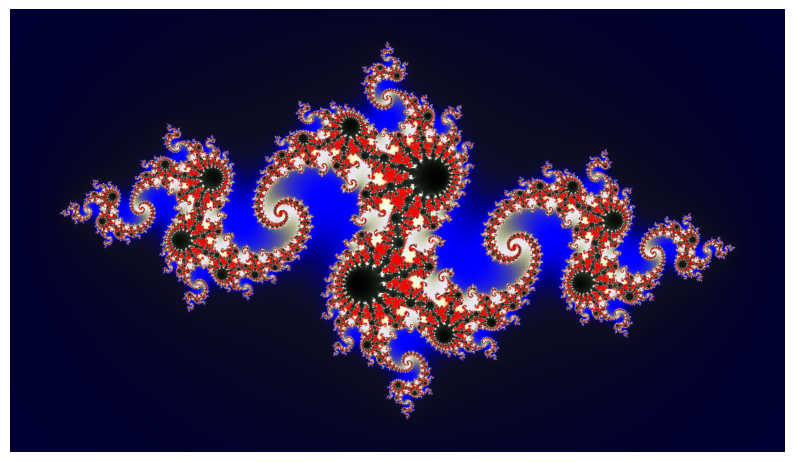

In [34]:
julia_grad = generate_julia_set(c, julia_cons, max_iter, escape_radius=escape_radius)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
cmap = ListedColormap(palette)

img = ax.imshow(
    julia_grad / max_iter,
    cmap=cmap,
    origin='lower',
)
ax.set_axis_off();